# Лабораторная работа №2

Выполнила Сектименко Ирина, студент группы М8О-410Б-22

## Выбор датасета

Обе задачи я буду решать на одном и том же датасете. Однако выявляться будут разные закономерности.

Данный датасет привлек мое внимание, потому что в современном мире достаточно много людей потребляет кофе и есть много разных точек зрения о его вреде и полезности. По ходу решения задач будут выдвинуты разные гипотезы, которые позволят подтвердить или опровергнуть пользу или вред кофе.

### Классификация

In [1]:
import pandas as pd

In [2]:
class_df = pd.read_csv("synthetic_coffee_health_10000.csv")
class_df = class_df.drop('ID', axis=1)
class_df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Будем предсказывать уровень стресса человека.

### Регрессия

In [24]:
reg_df = pd.read_csv("synthetic_coffee_health_10000.csv")
reg_df = reg_df.drop('ID', axis=1)
reg_df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Будем предсказывать сколько часов спит человек, зная информацию о количестве потребляемого кофе, испытываемом стрессе.

### Метрики

Для задачи классификации будем считать accurancy, precision, recall, а для регрессии - MAE и MSE.

## Создание бейзлайна

### Классификация

Поработаем немного с данными. Переведем все категориальные признаки (Gender, Country, Occupation) в численные с помощью one-hot-encoding, потому что все значения этих признаков развноправны.

In [3]:
class_df = pd.get_dummies(class_df, columns=['Gender', 'Country', 'Occupation'], drop_first=True)
class_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,...,False,True,False,False,False,False,False,False,False,True


Часть категориальных признаков закодируем label-енкодером. К таким признакам относятся Sleep_Quality, Stress_Level, Health_Issues, потому что чем больше число, тем выше уровень страсса или проблем со здоровьем.

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()
class_df['Stress_Level'] = label_encoder.fit_transform(class_df['Stress_Level'])
class_df['Health_Issues'] = label_encoder.fit_transform(class_df['Health_Issues'])
class_df['Sleep_Quality'] = label_encoder.fit_transform(class_df['Sleep_Quality'])
class_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,1,14.5,3,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,1,11.0,3,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,2,11.2,0,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,1,6.6,0,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,2,8.5,0,...,False,True,False,False,False,False,False,False,False,True


Поделим датасет на тренировачные и тестирующий.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
class_train, class_test = train_test_split(class_df, test_size=0.2)

Выделим целевой признак.

In [8]:
class_x_train = class_train.drop('Stress_Level', axis=1)
class_y_train = class_train['Stress_Level']

class_x_test = class_test.drop('Stress_Level', axis=1)
class_y_test = class_test['Stress_Level']

Импортируем модель логистическую регрессию из библиотеки sklearn. Обучим ее на наших данных и спрогнозируем результат на обучающей и тестовой выборке.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg_class = LogisticRegression(multi_class='multinomial', solver='lbfgs')

log_reg_class.fit(class_x_train, class_y_train)
class_y_train_pred = log_reg_class.predict(class_x_train)
class_y_test_pred = log_reg_class.predict(class_x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Оценим качество обученной модели.

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       0.96      0.96      0.96      5595
           2       0.85      0.85      0.85      1650

    accuracy                           0.94      8000
   macro avg       0.94      0.93      0.94      8000
weighted avg       0.94      0.94      0.94      8000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       0.96      0.96      0.96      1394
           2       0.86      0.88      0.87       400

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



Как на тренировочном, так и на тестовом, модель прекрасно справилась с предсказанием уровня стресса. Посмотрим, получится ли у нас улучшить метрики.

### Регрессия

По факту у нас та же самая предобработка данных, что и в классификации. Разница только в выделении целевой переменной.

In [25]:
reg_df = pd.get_dummies(reg_df, columns=['Gender', 'Country', 'Occupation'], drop_first=True)
reg_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,...,False,True,False,False,False,False,False,False,False,True


In [26]:
label_encoder = LabelEncoder()
reg_df['Stress_Level'] = label_encoder.fit_transform(reg_df['Stress_Level'])
reg_df['Health_Issues'] = label_encoder.fit_transform(reg_df['Health_Issues'])
reg_df['Sleep_Quality'] = label_encoder.fit_transform(reg_df['Sleep_Quality'])
reg_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,1,14.5,3,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,1,11.0,3,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,2,11.2,0,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,1,6.6,0,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,2,8.5,0,...,False,True,False,False,False,False,False,False,False,True


In [27]:
reg_train, reg_test = train_test_split(reg_df, test_size=0.2)

In [28]:
reg_x_train = reg_train.drop('Sleep_Hours', axis=1)
reg_y_train = reg_train['Sleep_Hours']

reg_x_test = reg_test.drop('Sleep_Hours', axis=1)
reg_y_test = reg_test['Sleep_Hours']

Предобработка данных завершена. Теперь обучим и протестируем модель.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin_regressor = LinearRegression(fit_intercept=True)

lin_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train)
reg_y_test_pred = lin_regressor.predict(reg_x_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.49677000055129633
Среднеквадратичная ошибка теста: 0.4971708979113871
Средняя абсолютная ошибка трейна: 0.5561862249633389
Средняя абсолютная ошибка теста: 0.5600770506948479


## Улучшение бейзлайна

### Классификация

#### Гипотеза 1

Приверим кореляцию признаков. Посмотрим, какие из них линейно зависимы. Делать это будем с помощью матрицы корреляции.

Однако я уже сейчас могу предположить, что Sleep_Hours и Sleep_Quality линейно зависимы.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

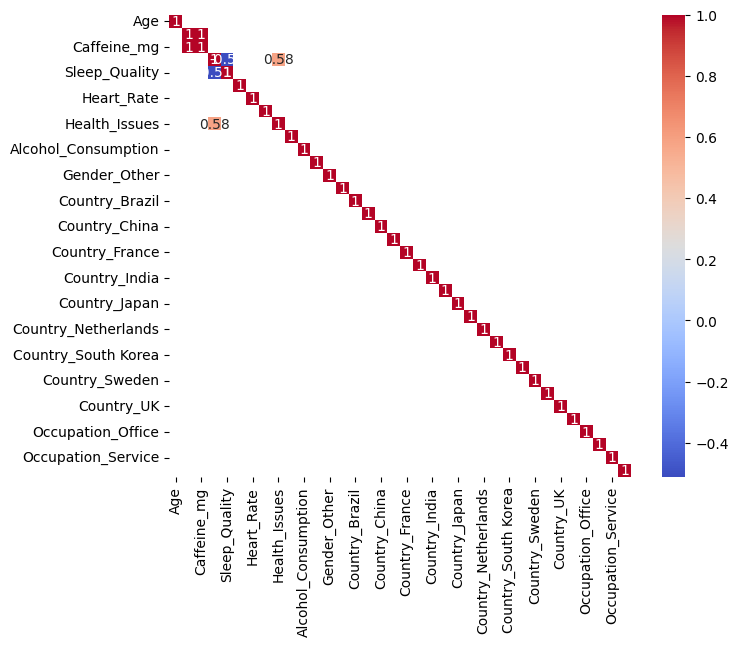

In [14]:
correlation_matrix = class_df.drop('Stress_Level', axis=1).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
mask = high_corr.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

Получили, что столбцы Coffee_Intake и Caffeine_mg линейно зависимы, что в целом логично, чем больше кружек кофе выпьешь, тем больше кофеина получишь.

Столбцы Sleep_Quality и Sleep_Hours коррелируешь на -0,5, Health_Issues и Sleep_Hours - 0,6.

Удалим некоторые столбцы, чтобы избавиться от линейной зависимости.

In [15]:
class_x_test = class_x_test.drop(['Caffeine_mg'], axis=1)
class_x_train = class_x_train.drop(['Caffeine_mg'], axis=1)

In [16]:
log_reg_class = LogisticRegression(multi_class='multinomial', solver='lbfgs')

log_reg_class.fit(class_x_train, class_y_train)
class_y_train_pred = log_reg_class.predict(class_x_train)
class_y_test_pred = log_reg_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       0.98      0.98      0.98      5595
           2       0.92      0.92      0.92      1650

    accuracy                           0.97      8000
   macro avg       0.97      0.96      0.97      8000
weighted avg       0.97      0.97      0.97      8000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       0.98      0.98      0.98      1394
           2       0.92      0.93      0.92       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Удаление столбца Caffeine_mg, который давал большую корреляцию со столбцом Coffee_Intake привело пусь и к небольшому (улучшилось на сотую), но все же улучшению прогноза корящих людей на тестовой выборке.

#### Гипотеза 2

Посмотрим к чему приведет настрока гиперпараметров KNN-классификатора.

In [17]:
log_reg_class = LogisticRegression(solver='newton-cg')

log_reg_class.fit(class_x_train, class_y_train)
class_y_train_pred = log_reg_class.predict(class_x_train)
class_y_test_pred = log_reg_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00      5595
           2       1.00      1.00      1.00      1650

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      1394
           2       1.00      1.00      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Все метрики - единица, лучше уже быть не может.

Думаю, это связано с тем, что данные созданы синтетически. И судя по всему линейная функция прекрасно описывает их.

Для оптимизации весов модели был использован метод Ньютона, метод второго порядка, в котором явно мычисляется матрица Гессе.

### Регрессия

#### Гипотеза 1

Приверим кореляцию признаков. Посмотрим, какие из них линейно зависимы. Делать это будем с помощью матрицы корреляции.

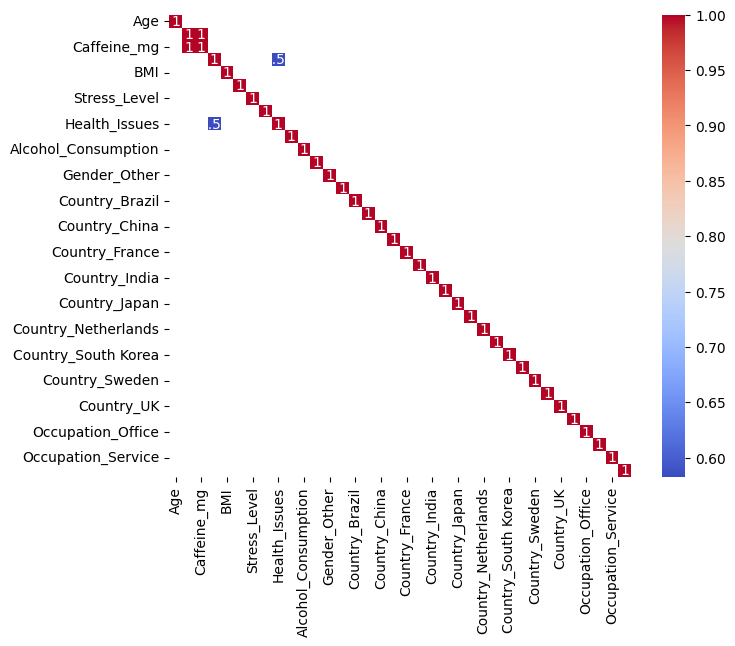

In [17]:
correlation_matrix = reg_df.drop('Sleep_Quality', axis=1).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
mask = high_corr.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

Как и в случае с классификацией, можно сказать, что столбцы Coffee_Intake и Caffeine_mg линейно зависимы. Удалим один из них и проетстируем модель.

In [33]:
reg_x_test = reg_x_test.drop(['Caffeine_mg'], axis=1)
reg_x_train = reg_x_train.drop(['Caffeine_mg'], axis=1)

In [34]:
lin_regressor = LinearRegression(fit_intercept=True)

lin_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train)
reg_y_test_pred = lin_regressor.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.4968419635204026
Среднеквадратичная ошибка теста: 0.49697603341796726
Средняя абсолютная ошибка трейна: 0.5562366111156242
Средняя абсолютная ошибка теста: 0.559912233395847


Ошибка уменьшилась на чуть-чуть, модель стала более предсказуемой, ведь матрица признаков стала невырожденной.

#### Гипотеза 2

Проведем нормализацию (2 вида), обучим модель, протестируем и сделаем выводы.

Min-max нормализация

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

reg_x_train_new = scaler.fit_transform(reg_x_train)
reg_x_test_new = scaler.transform(reg_x_test)

In [37]:
lin_regressor = LinearRegression(fit_intercept=True)

lin_regressor.fit(reg_x_train_new, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train_new)
reg_y_test_pred = lin_regressor.predict(reg_x_test_new)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.4968419635204026
Среднеквадратичная ошибка теста: 0.4969760334179673
Средняя абсолютная ошибка трейна: 0.5562366111156243
Средняя абсолютная ошибка теста: 0.5599122333958471


Z-score нормализация

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

reg_x_train_new = scaler.fit_transform(reg_x_train)
reg_x_test_new = scaler.transform(reg_x_test)

In [40]:
lin_regressor = LinearRegression(fit_intercept=True)

lin_regressor.fit(reg_x_train_new, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train_new)
reg_y_test_pred = lin_regressor.predict(reg_x_test_new)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.4968419635204026
Среднеквадратичная ошибка теста: 0.4969760334179673
Средняя абсолютная ошибка трейна: 0.5562366111156241
Средняя абсолютная ошибка теста: 0.559912233395847


Нормализация не улучшила метрики предсказания. Это связано с тем, что линейная модель основания на свойствах линейности матрицы и линейные преобзразования матрицы признаков не приводят к изменению результата.

#### Гипотеза 3

Посмотрим как будет влияет регуляризация на метрики прогнозирования.

Экспериментировать будем сразу с ElasticNet. Этот способ регуляризации объединяет в себе l1 и l2 с разными коэффициентами.

In [41]:
from sklearn.linear_model import ElasticNet

In [42]:
elastic = ElasticNet(alpha=0.1, l1_ratio=1.0, max_iter=10000)

elastic.fit(reg_x_train, reg_y_train)
reg_y_train_pred = elastic.predict(reg_x_train)
reg_y_test_pred = elastic.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.5846256089644484
Среднеквадратичная ошибка теста: 0.5644649445229247
Средняя абсолютная ошибка трейна: 0.6095556749629805
Средняя абсолютная ошибка теста: 0.5973060856511169


Применение регуляризации не улучшило метрики, а даже наоборот, немного ухудшило. Модель и до регуляризации неплохо справлялась с предсказанием на тестовых данных, что свидетельствет о том, что переобучения не было. Значит, регуляризация действительно не нужна в этом случае.

#### Гипотеза 4

Посмотрим, есть ли выбросы в данных.

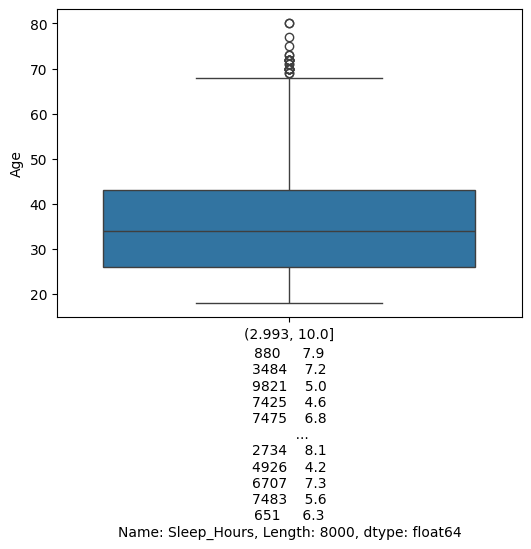

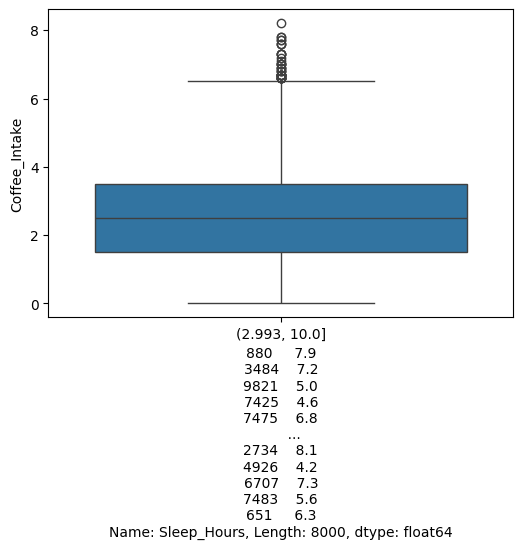

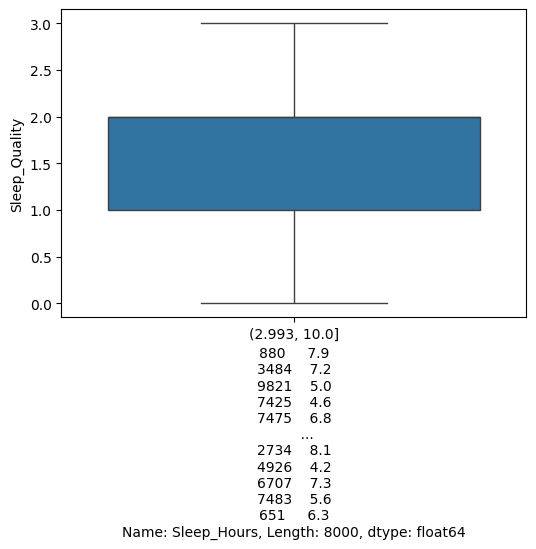

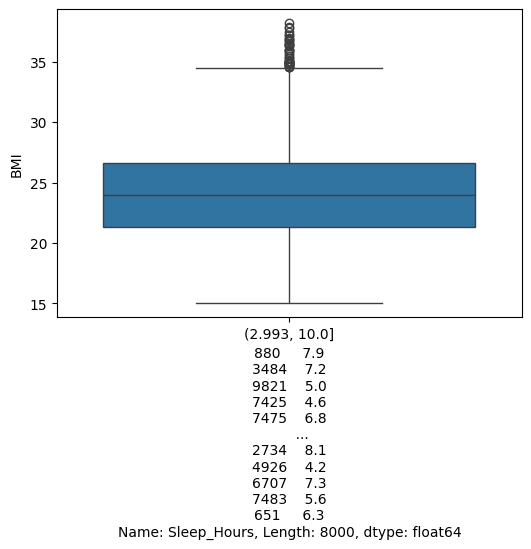

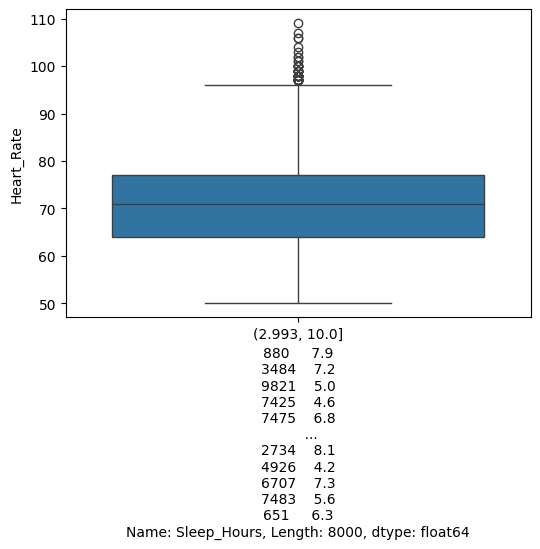

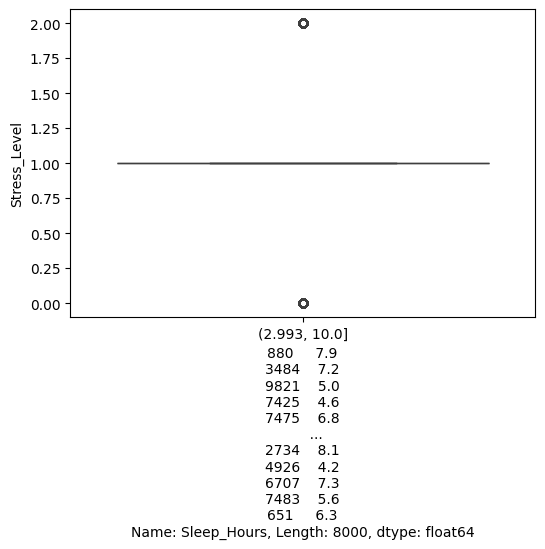

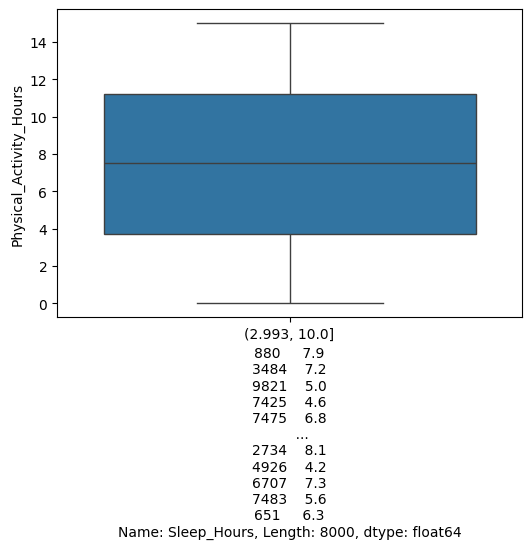

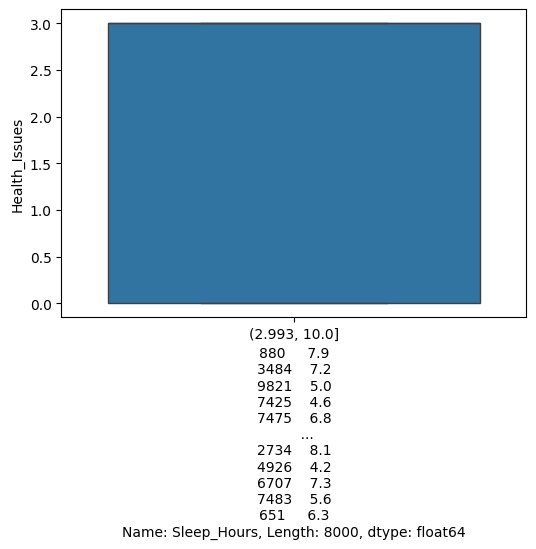

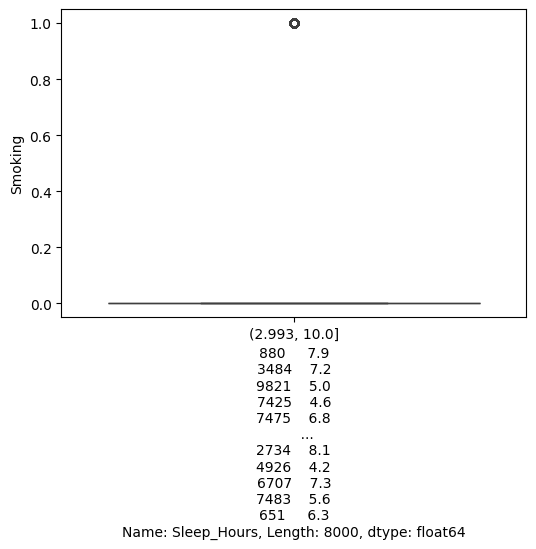

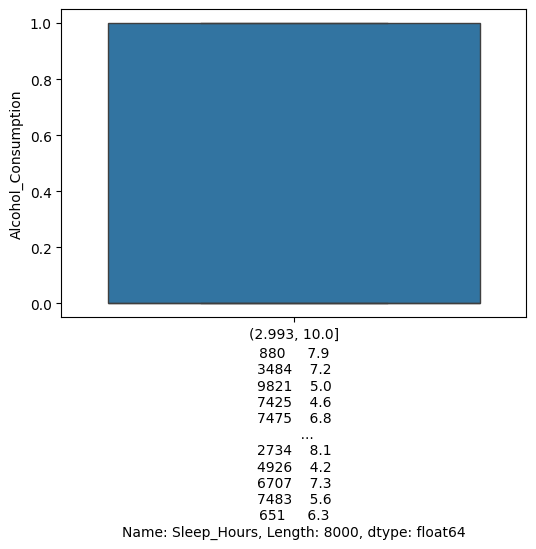

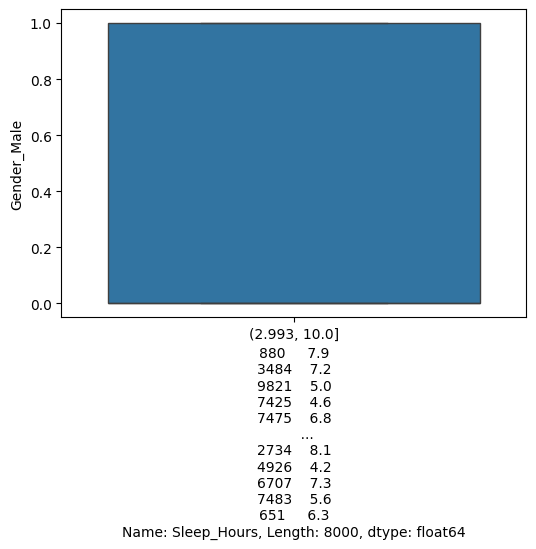

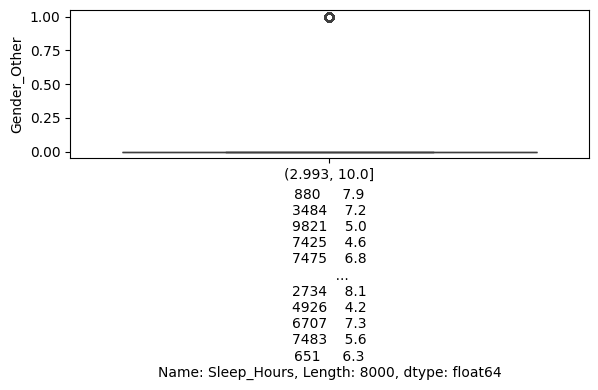

In [43]:
reg_df_plot = reg_df.copy()
reg_df_plot['Sleep_Hours'] = pd.cut(reg_df_plot['Sleep_Hours'], bins=1)

for i, col in enumerate(reg_x_train):
    if 'Country' in col or 'Occupation' in col or col == 'Sleep_Hours':
        continue
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=reg_df_plot, x='Sleep_Hours', y = col)
    plt.xlabel(reg_y_train)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Попробуем почистить датасет от выбросов и посмотрим, к чему это приведет.

In [44]:
reg_train[reg_train["Age"] >= 70]["Age"].count()

np.int64(17)

In [45]:
reg_train = reg_train[reg_train["Age"] < 70]

In [46]:
reg_train[reg_train["Coffee_Intake"] >= 7]["Age"].count()

np.int64(18)

In [47]:
reg_train = reg_train[reg_train["Coffee_Intake"] < 7]

In [48]:
reg_train[reg_train["BMI"] >= 35]["Age"].count()

np.int64(23)

In [49]:
reg_train = reg_train[reg_train["BMI"] < 35]

In [50]:
reg_x_train = reg_train.drop('Sleep_Hours', axis=1)
reg_y_train = reg_train['Sleep_Hours']

reg_x_test = reg_test.drop('Sleep_Hours', axis=1)
reg_y_test = reg_test['Sleep_Hours']

In [51]:
lin_regressor = LinearRegression(fit_intercept=True)

lin_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train)
reg_y_test_pred = lin_regressor.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.4902775428419967
Среднеквадратичная ошибка теста: 0.497081437793616
Средняя абсолютная ошибка трейна: 0.5524783387632813
Средняя абсолютная ошибка теста: 0.5595927517573622


Избавление от выбрасов на тренировочной выборке не сильно повлияло на предсказание, ошибка уменьшилась на десятитысячную.

## Имплементация алгоритма

### Регрессия

Данный раздел начнем с написания класса линейной регрессии, так как эта же модель будет использоваться и внутри класса логистической регрессии.

In [18]:
import numpy as np

In [19]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.asarray(X).astype(np.float64)
        y = np.asarray(y).astype(np.float64)

        if self.fit_intercept:
            X = np.column_stack((np.ones(X.shape[0]), X))

        w = np.linalg.pinv(X) @ y

        if self.fit_intercept:
            self.intercept_ = w[0]
            self.coef_ = w[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = w

        return self

    def predict(self, X):
        X = np.asarray(X).astype(np.float64)
        return X @ self.coef_ + self.intercept_

In [52]:
lin_regressor = MyLinearRegression()

lin_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train)
reg_y_test_pred = lin_regressor.predict(reg_x_test)

In [53]:
mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.4902775428419967
Среднеквадратичная ошибка теста: 0.4970814377936215
Средняя абсолютная ошибка трейна: 0.5524783387632788
Средняя абсолютная ошибка теста: 0.5595927517573634


Теперь применим гипотезы из раздела выше и посмотрим, к каким улучшениям это приведет.

In [55]:
reg_x_test = reg_x_test.drop(['Caffeine_mg'], axis=1)
reg_x_train = reg_x_train.drop(['Caffeine_mg'], axis=1)

In [54]:
reg_train[reg_train["Age"] >= 70]["Age"].count()
reg_train = reg_train[reg_train["Age"] < 70]
reg_train[reg_train["Coffee_Intake"] >= 7]["Age"].count()
reg_train = reg_train[reg_train["Coffee_Intake"] < 7]
reg_train[reg_train["BMI"] >= 35]["Age"].count()
reg_train = reg_train[reg_train["BMI"] < 35]

In [56]:
lin_regressor = MyLinearRegression()

lin_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = lin_regressor.predict(reg_x_train)
reg_y_test_pred = lin_regressor.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.49033596966330084
Среднеквадратичная ошибка теста: 0.4969142818260505
Средняя абсолютная ошибка трейна: 0.552531053506962
Средняя абсолютная ошибка теста: 0.559416776162966


Очистка датасета не привела к серьезным улучшениям, как и в случае с моделью из sklearn.

### Классификация

Сначала создадим класс бинарной классификации на основе линейной регрессии. Потом, используя метод один против всех, расширим бинарную классификацию на мультиклассовую, ведь в моей задаче 3 класса.

In [20]:
class BinaryLogisticRegression:
    def __init__(self, fit_intercept=True, limit=0.5):
        self.model = MyLinearRegression(fit_intercept)
        self.limit = limit

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        z = self.model.predict(X)
        z = 1.0 / (1.0 + np.exp(-z))
        return np.where(z > self.limit, 1, 0)

In [21]:
class LogisticRegressionMulticlass:
    def __init__(self, fit_intercept=True, limit=0.5):
        self.fit_intercept = fit_intercept
        self.limit = limit

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y)
        self.classes_ = np.unique(y)
        self.models_ = []

        for cls in self.classes_:
            y_binary = (y == cls).astype(int)
            model = BinaryLogisticRegression(self.fit_intercept, self.limit)
            model.fit(X, y_binary)
            self.models_.append(model)

    def predict_proba(self, X):
        X = np.array(X, dtype=np.float64)
        probas = np.zeros((X.shape[0], len(self.classes_)))
        for i, model in enumerate(self.models_):
            probas[:, i] = model.predict(X)
        probas_sum = probas.sum(axis=1, keepdims=True)
        probas_sum = np.where(probas_sum == 0, 1, probas_sum)
        return probas / probas_sum

    def predict(self, X):
        probas = self.predict_proba(X)
        return self.classes_[np.argmax(probas, axis=1)]

In [22]:
log_reg_class = LogisticRegressionMulticlass(limit=0.6)

log_reg_class.fit(class_x_train, class_y_train)
class_y_train_pred = log_reg_class.predict(class_x_train)
class_y_test_pred = log_reg_class.predict(class_x_test)

In [23]:
print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       755
           1       1.00      1.00      1.00      5595
           2       1.00      1.00      1.00      1650

    accuracy                           1.00      8000
   macro avg       1.00      0.99      0.99      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       206
           1       1.00      1.00      1.00      1394
           2       1.00      1.00      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Подбирая и меняя пороговые значения в классе, написанном мной, мы уже смогли достичь максимально возможных значений метрик. Нет смысла в дальнейшем улучшении бейзлайна.